# MNIST Classification using different classifiers(scikit-learn)

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

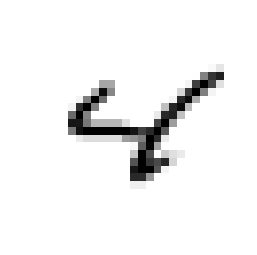

In [5]:
random_digit = X[28000]
random_digit_image=random_digit.reshape(28, 28)
plt.imshow(random_digit_image, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
y[28000]

4.0

In [7]:
# dataset is divided into train,test set already...train set-first 60000,test set-next 10000
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
# shuffling for similar cross validation folds
shuffle = np.random.permutation(60000)
X_train,y_train = X_train[shuffle],y_train[shuffle]

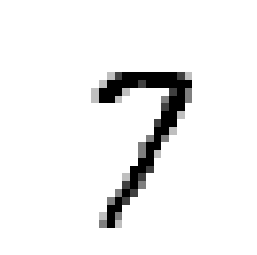

In [9]:
# found instance of 7 to verify with SGDClassifier
another_digit = X[48000]
another_digit_image=another_digit.reshape(28, 28)
plt.imshow(another_digit_image, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [10]:
y[48000]

7.0

## Binary Classifer

In [11]:
# Just detecting/classifying whether 7 or not 7
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier()
sgd_clf.fit(X_train,y_train_7)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [13]:
sgd_clf.predict([another_digit]) # since another digit stored 7,predicts correctly 

array([ True], dtype=bool)

In [14]:
sgd_clf.predict([random_digit]) # since random digit stored 4,predicts correctly

array([False], dtype=bool)

In [15]:
# measurig accuracy using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_7, cv=3, scoring="accuracy")

array([ 0.97705115,  0.9707    ,  0.97824891])

In [16]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_7, cv=3)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_7, y_train_predict)

array([[52560,  1175],
       [  628,  5637]], dtype=int64)

In [18]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_7, y_train_predict)

0.82751027598355842

In [19]:
recall_score(y_train_7, y_train_predict)

0.89976057462090986

In [20]:
from sklearn.metrics import f1_score
f1_score(y_train_7, y_train_predict)

0.86212434044505626

## Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier()
ranfor.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
y_pred = ranfor.predict(X_test)
ranfor.score(X_test, y_test)

0.94930000000000003

In [26]:
ranfor.predict([random_digit])   # predicting correctly

array([ 4.])

In [27]:
ranfor.predict([another_digit])  # predicting correctly

array([ 7.])

In [28]:
ranfor.predict_proba([another_digit])  # probability 1 for 7

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]])

In [29]:
ranfor.predict_proba([random_digit])  # probability 0.9 for 4

array([[ 0. ,  0. ,  0. ,  0. ,  0.9,  0. ,  0.1,  0. ,  0. ,  0. ]])

## Error Analysis

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(ranfor, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.94321136,  0.9419971 ,  0.93984098])

In [32]:
y_train_pred = cross_val_predict(ranfor, X_train_scaled, y_train, cv=3)
conmx = confusion_matrix(y_train, y_train_pred)
conmx

array([[5798,    1,   17,    6,    7,   18,   35,    2,   35,    4],
       [   2, 6629,   43,    9,   13,    6,    7,   15,   13,    5],
       [  48,   29, 5640,   47,   45,   10,   21,   48,   60,   10],
       [  23,   21,  124, 5646,    6,  108,    8,   62,   91,   42],
       [  23,   21,   32,    7, 5535,    6,   35,   15,   24,  144],
       [  36,   17,   26,  182,   23, 4988,   53,    7,   52,   37],
       [  50,   12,   26,    6,   29,   71, 5698,    0,   21,    5],
       [  10,   32,   88,   25,   62,    8,    0, 5949,   17,   74],
       [  34,   44,   86,  149,   55,  114,   35,   12, 5251,   71],
       [  31,   12,   38,   94,  169,   50,    5,   98,   61, 5391]], dtype=int64)

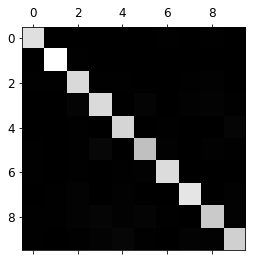

In [35]:
plt.matshow(conmx, cmap=plt.cm.gray)
plt.show()

## Multilabel Classification

In [36]:
# Using KNN Classifier
from sklearn.neighbors import KNNeighborsClassifier
knn_clf = KNNeighborsClassifier()
knn_clf.fit(X_train, y_train)

ImportError: cannot import name 'KNNeighborsClassifier'